In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
febdf = pd.read_csv('/Users/ir3n3br4t515/Desktop/February.csv')


In [3]:
febdf_1 = febdf.fillna(febdf.mean())           


In [4]:
febdf.head(10)

,MTM,Property_Code,Tenant_Code,Unit_Code,Lease_To_Date,Lease_From_Date,Move_In_Date,Rent,Market_Rent,Property_Name,BedRooms,Unit_Address,Current_Term,Status,Renewal_Status,MarketRentDifference
0,0.0,555.0,t0063568,9-3C,2022-02-12,2021-02-13,2019-02-13,1238.0,1350,The Crossings at White Marsh I,1.0,555-A1,12.0,Current,Renewed,-1344.0
1,0.0,585.0,tgr00723,723,2022-02-07,2021-02-08,2019-02-08,1517.0,1595,The Grand Reserve at Tampa Palms,2.0,585-2C.R,12.0,Current,Renewed,-936.0
2,0.0,585.0,tgr01327,1327,2022-02-05,2021-02-06,2019-02-06,1542.0,1630,The Grand Reserve at Tampa Palms,2.0,585-2C.R,12.0,Current,Renewed,-1056.0
3,0.0,585.0,t0075089,416,2021-02-21,2020-02-22,2018-02-22,1438.0,1475,The Grand Reserve at Tampa Palms,2.0,585-2D.R,12.0,Past,Not Renewed,-444.0
4,0.0,515.0,t0071340,0001D302,2021-02-18,2020-03-19,2020-03-19,1115.0,1290,Doncaster Village Apartments,2.0,515-2A,11.0,Past,Not Renewed,-1925.0
5,0.0,445.0,t0127304,331,2022-02-14,2021-02-15,2017-10-15,1394.0,1405,Edison Lofts,1.0,445-A5,12.0,Current,Renewed,-132.0
6,0.0,565.0,t0063949,4806-101,2022-02-19,2021-02-20,2019-02-16,1292.0,1515,The Crossings at White Marsh II,1.0,565-A1.R,12.0,Current,Renewed,-2676.0
7,1.0,580.0,t0063959,4652-403,2021-02-21,2020-02-22,2019-02-22,1726.0,1935,Riverstone at Owings Mills Apartments,2.0,580-B1,12.0,Notice,Not Renewed,-2508.0
8,0.0,555.0,t0064010,23-2D,2022-02-06,2021-02-07,2019-03-07,1297.0,1480,The Crossings at White Marsh I,1.0,555-A1.R,12.0,Current,Renewed,-2196.0
9,0.0,515.0,t0061644,0004L302,2022-02-13,2021-02-14,2018-04-14,1199.0,1440,Doncaster Village Apartments,2.0,515-2A,12.0,Current,Renewed,-2892.0


In [5]:
febdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MTM                   131 non-null    float64
 1   Property_Code         131 non-null    float64
 2   Tenant_Code           131 non-null    object 
 3   Unit_Code             131 non-null    object 
 4   Lease_To_Date         131 non-null    object 
 5   Lease_From_Date       131 non-null    object 
 6   Move_In_Date          131 non-null    object 
 7   Rent                  132 non-null    float64
 8   Market_Rent           133 non-null    object 
 9   Property_Name         131 non-null    object 
 10  BedRooms              131 non-null    float64
 11  Unit_Address          131 non-null    object 
 12  Current_Term          131 non-null    float64
 13  Status                131 non-null    object 
 14  Renewal_Status        131 non-null    object 
 15  MarketRentDifference  1

In [6]:
febdf_1[['MTM', 'Property_Code', 'Rent', 'BedRooms', 'MarketRentDifference']].corr()


,MTM,Property_Code,Rent,BedRooms,MarketRentDifference
MTM,1.000000,0.027562,0.000844,0.112096,-0.067214
Property_Code,0.027562,1.000000,-0.000509,0.276550,-0.510958
Rent,0.000844,-0.000509,1.000000,0.007589,0.010185
BedRooms,0.112096,0.276550,0.007589,1.000000,-0.141760
MarketRentDifference,-0.067214,-0.510958,0.010185,-0.141760,1.000000


In [7]:
febdf_1.groupby('Rent').mean()[['BedRooms']]


,BedRooms
Rent,
894.000000,1.000000
954.000000,1.000000
967.000000,1.000000
970.000000,1.000000
974.000000,1.000000
...,...
2465.000000,2.000000
2470.000000,2.000000
2578.000000,2.000000


In [8]:
febdf_1.groupby('Property_Code').mean()[['Rent']]


,Rent
Property_Code,
445.000000,1722.000000
515.000000,1100.121212
530.000000,1454.384615
536.374046,94175.809091
555.000000,1313.642857
565.000000,1421.733333
580.000000,1629.761905
585.000000,1493.611765


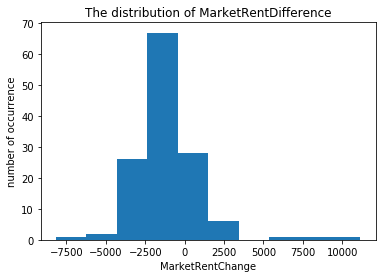

In [9]:

plt.hist(febdf_1.MarketRentDifference)
plt.title("The distribution of MarketRentDifference")
plt.xlabel("MarketRentChange")
plt.ylabel("number of occurrence")
plt.show()

In [12]:
febdf_1.dtypes

MTM                     float64
Property_Code           float64
Tenant_Code              object
Unit_Code                object
Lease_To_Date            object
Lease_From_Date          object
Move_In_Date             object
Rent                    float64
Market_Rent              object
Property_Name            object
BedRooms                float64
Unit_Address             object
Current_Term            float64
Status                   object
Renewal_Status           object
MarketRentDifference    float64
dtype: object

In [15]:


indexNames = febdf_1[febdf_1['Market_Rent'] == '6.93%'].index
febdf_1.drop(indexNames , inplace=True)

In [16]:
febdf_1["Market_Rent"] = pd.to_numeric(febdf_1["Market_Rent"])


In [17]:
febdf_1.dtypes

MTM                     float64
Property_Code           float64
Tenant_Code              object
Unit_Code                object
Lease_To_Date            object
Lease_From_Date          object
Move_In_Date             object
Rent                    float64
Market_Rent               int64
Property_Name            object
BedRooms                float64
Unit_Address             object
Current_Term            float64
Status                   object
Renewal_Status           object
MarketRentDifference    float64
dtype: object

In [18]:
sum_column = febdf_1["Rent"] - febdf_1["Market_Rent"]
febdf_1["col3"] = sum_column
print(febdf_1)

          MTM  Property_Code Tenant_Code Unit_Code Lease_To_Date  \
0    0.000000     555.000000    t0063568      9-3C    2022-02-12   
1    0.000000     585.000000    tgr00723       723    2022-02-07   
2    0.000000     585.000000    tgr01327      1327    2022-02-05   
3    0.000000     585.000000    t0075089       416    2021-02-21   
4    0.000000     515.000000    t0071340  0001D302    2021-02-18   
..        ...            ...         ...       ...           ...   
127  0.000000     530.000000    t0071757   201-203    2021-02-16   
128  0.000000     445.000000    t0074963       527    2021-02-27   
129  0.000000     580.000000    t0077837  9014-401    2022-02-01   
130  0.000000     565.000000    t0070317  4802-301    2022-02-16   
131  0.083969     536.374046         NaN       NaN           NaN   

    Lease_From_Date Move_In_Date      Rent  Market_Rent  \
0        2021-02-13   2019-02-13    1238.0         1350   
1        2021-02-08   2019-02-08    1517.0         1595   
2     

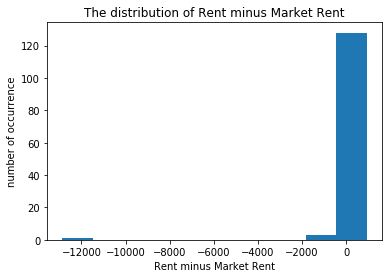

In [22]:

plt.hist(febdf_1.col3)
plt.title("The distribution of Rent minus Market Rent")
plt.xlabel("Rent minus Market Rent")
plt.ylabel("number of occurrence")
plt.show()

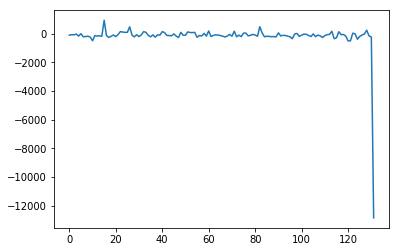

In [20]:
febdf_1["col3"].plot()

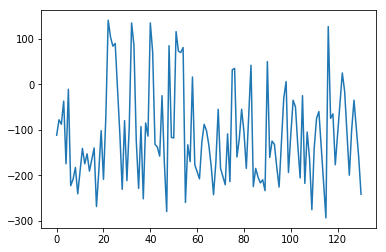

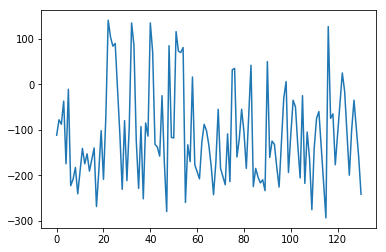

In [21]:
y = febdf_1['col3']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))

y[removed_outliers].plot().get_figure()